In [14]:
import numpy as np
import tensorflow as tf
import keras as kr
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# Loading the data
(X_train, y_train), (X_test, y_test) = kr.datasets.mnist.load_data()

In [16]:
# Preprocessing the data
X_train = np.array(X_train, dtype = np.uint8)/255.0
X_test = np.array(X_test, dtype = np.uint8)/255.0

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_30 (Dense)            (None, 256)               200960    
                                                                 
 dense_31 (Dense)            (None, 128)               32896     
                                                                 
 dense_32 (Dense)            (None, 64)                8256      
                                                                 
 dense_33 (Dense)            (None, 128)               8320      
                                                                 
 dense_34 (Dense)            (None, 256)               33024     
                                                                 
 dense_35 (Dense)            (None, 784)               2014

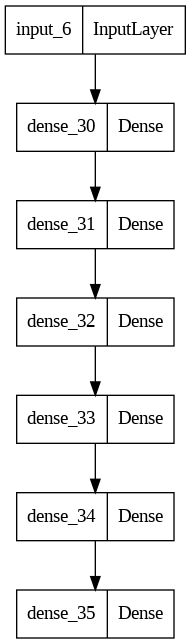

In [17]:
# Creating the autoencoder

input_units = 784
encoding_units = 64

input = kr.layers.Input((784,))

encoder_1 = kr.layers.Dense(256, activation = 'relu')
encoder_2 = kr.layers.Dense(128, activation = 'relu')
encoder_3 = kr.layers.Dense(encoding_units, activation = 'relu')

decoder_1 = kr.layers.Dense(128, activation = 'relu')
decoder_2 = kr.layers.Dense(256, activation = 'relu')
decoder_3 = kr.layers.Dense(784, activation = 'sigmoid')

encoder = encoder_3(encoder_2(encoder_1(input)))
decoder = decoder_3(decoder_2(decoder_1(encoder)))

autoencoder = kr.models.Model(input, decoder)

autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

autoencoder.summary()

kr.utils.plot_model(autoencoder, '/content/autoencoder.png')

In [18]:
history = autoencoder.fit(X_train, X_train, epochs = 50, batch_size = 256, validation_data = (X_test, X_test))

Epoch 1/50
235/235 [==============================] - 11s 36ms/step - loss: 0.2179 - accuracy: 0.0085 - val_loss: 0.1394 - val_accuracy: 0.0088
Epoch 2/50
235/235 [==============================] - 6s 26ms/step - loss: 0.1249 - accuracy: 0.0116 - val_loss: 0.1126 - val_accuracy: 0.0118
Epoch 3/50
235/235 [==============================] - 8s 34ms/step - loss: 0.1091 - accuracy: 0.0130 - val_loss: 0.1039 - val_accuracy: 0.0129
Epoch 4/50
235/235 [==============================] - 6s 28ms/step - loss: 0.1017 - accuracy: 0.0132 - val_loss: 0.0976 - val_accuracy: 0.0107
Epoch 5/50
235/235 [==============================] - 8s 33ms/step - loss: 0.0967 - accuracy: 0.0131 - val_loss: 0.0938 - val_accuracy: 0.0124
Epoch 6/50
235/235 [==============================] - 6s 27ms/step - loss: 0.0933 - accuracy: 0.0130 - val_loss: 0.0907 - val_accuracy: 0.0140
Epoch 7/50
235/235 [==============================] - 8s 33ms/step - loss: 0.0906 - accuracy: 0.0134 - val_loss: 0.0883 - val_accuracy: 0.012

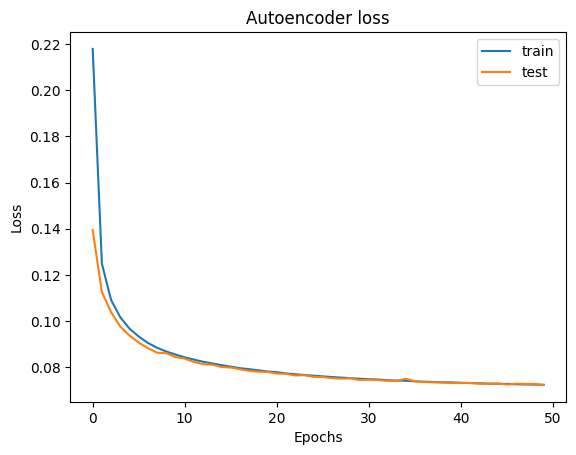

<Figure size 640x480 with 0 Axes>

In [25]:
# Visualising the loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Autoencoder loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
plt.savefig('/content/loss.png')

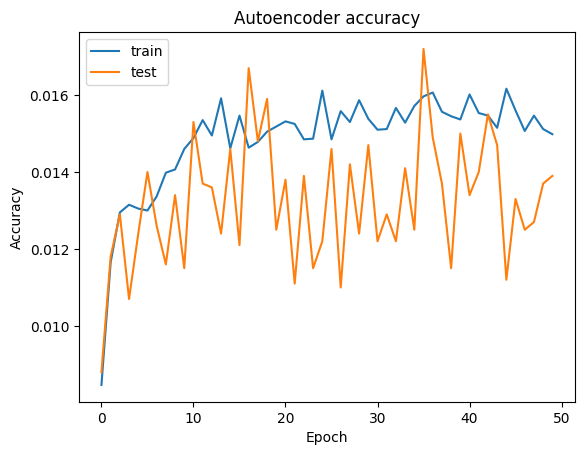

<Figure size 640x480 with 0 Axes>

In [26]:
# Visualising the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Autoencoder accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('/content/accuracy.png')

In [27]:
# Isolating the encoder

encoder_only = kr.models.Model(input, encoder)

# Isolating the decoder

decoder_input = kr.layers.Input((64,))
decoder_L1 = autoencoder.layers[-3]
decoder_L2 = autoencoder.layers[-2]
decoder_L3 = autoencoder.layers[-1]

decoder_only = kr.models.Model(decoder_input, decoder_L3(decoder_L2(decoder_L1(decoder_input))))

Input an index (<10000): 3267
1/1 [==============================] - 0s 25ms/step


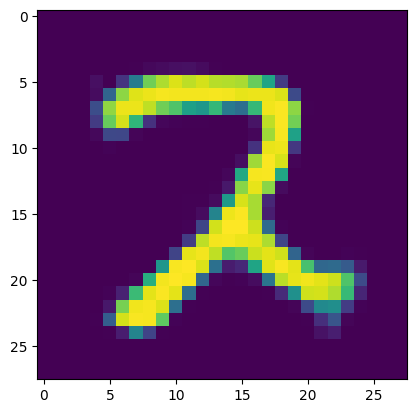

In [35]:
idx = int(__builtins__.input("Input an index (<10000): "))
test_image = X_test[idx]

encoded_rep = encoder_only.predict(test_image.reshape((1, 784)))

reconstructed_rep = decoder_only.predict(encoded_rep)

plt.imshow(reconstructed_rep.reshape((1, 28, 28))[0]) # new_image

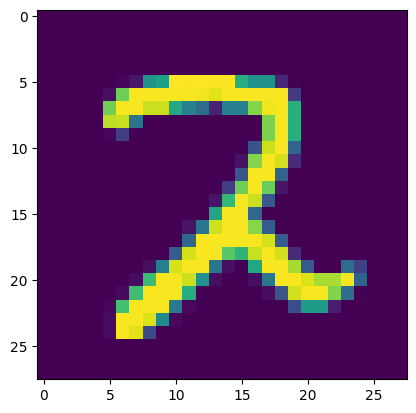

In [36]:
plt.imshow(test_image.reshape((28, 28))) # Original image

In [39]:
# Calculating MSE between the new image and the old image

def mse(img1, img2):
  if img1.shape != img2.shape:
    raise ValueError("Input images must have the same shape")

  return np.mean((img1 - img2) ** 2)

mse(reconstructed_rep.reshape((1, 28, 28))[0], test_image.reshape((28, 28)))

0.006203842781270283

In [40]:
# Saving the models

autoencoder.save('/content/autoencoder.keras')
encoder_only.save('/content/encoder.keras')
decoder_only.save('/content/decoder.keras')